In [1]:
# Packages pour la visualisation 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline 
import math

import pickle

In [2]:
with open('data/data_clean.pkl', 'rb') as f:
    my_unpickle = pickle.Unpickler(f)
    df_cleaned = my_unpickle.load()

In [3]:
df_cleaned.shape

(471149, 16)

### 1. Exploration visuelle de différentes variables 

#### 1.1 experimentationTechnique 

In [4]:
print("Nous dénombrons :\n", df_cleaned.experimentalTechnique.nunique(), "techniques d'extractions de la proteine")
print("###"*25)
print("Les différentes techniques et leur fréquence ci-dessous:\n", df_cleaned.experimentalTechnique.value_counts(normalize=True))

Nous dénombrons :
 32 techniques d'extractions de la proteine
###########################################################################
Les différentes techniques et leur fréquence ci-dessous:
 X-RAY DIFFRACTION                                            0.860830
ELECTRON MICROSCOPY                                          0.104252
SOLUTION NMR                                                 0.032391
SOLID-STATE NMR                                              0.000949
ELECTRON CRYSTALLOGRAPHY                                     0.000320
SOLUTION SCATTERING                                          0.000206
NEUTRON DIFFRACTION                                          0.000189
SOLID-STATE NMR, ELECTRON MICROSCOPY                         0.000166
FIBER DIFFRACTION                                            0.000125
NEUTRON DIFFRACTION, X-RAY DIFFRACTION                       0.000106
X-RAY DIFFRACTION, NEUTRON DIFFRACTION                       0.000087
POWDER DIFFRACTION                

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'X-RAY DIFFRACTION'),
  Text(1, 0, 'ELECTRON MICROSCOPY'),
  Text(2, 0, 'SOLUTION NMR'),
  Text(3, 0, 'SOLID-STATE NMR'),
  Text(4, 0, 'ELECTRON CRYSTALLOGRAPHY')])

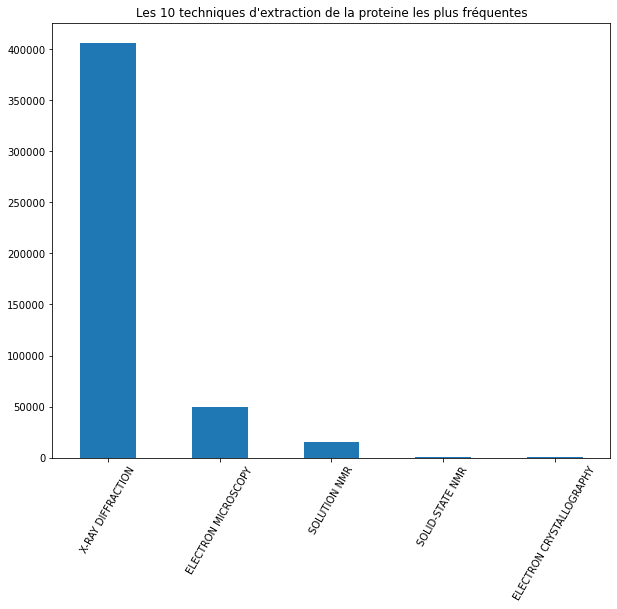

In [5]:
df_cleaned.experimentalTechnique.value_counts()[:5].plot(kind = "bar", figsize = (10,8),
                                                title = "Les 10 techniques d'extraction de la proteine les plus fréquentes")
plt.xticks(rotation = 60)
#plt.savefig('images/techniques_protein_extraction');

Text(0.5, 1.0, "Les 10 techniques d'extraction de la proteine les plus fréquentes")

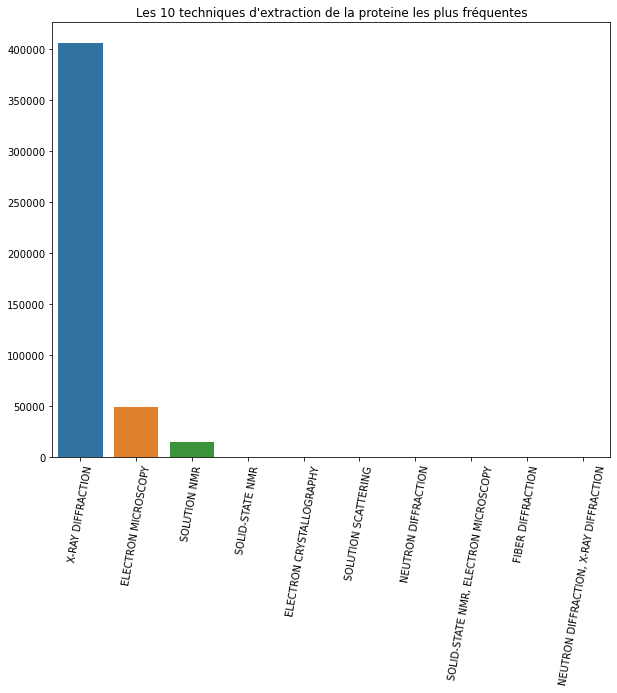

In [6]:
plt.figure(figsize =(10,8))
sns.barplot(x = df_cleaned.experimentalTechnique.value_counts().index[:10], 
            y =df_cleaned.experimentalTechnique.value_counts().values[:10],  data = df_cleaned )
plt.xticks(rotation = 80)
plt.title("Les 10 techniques d'extraction de la proteine les plus fréquentes")
#plt.savefig('images/figures/technique_extract');

Text(0.5, 1.0, "Les 5 techniques d'extraction de la proteine les plus fréquentes")

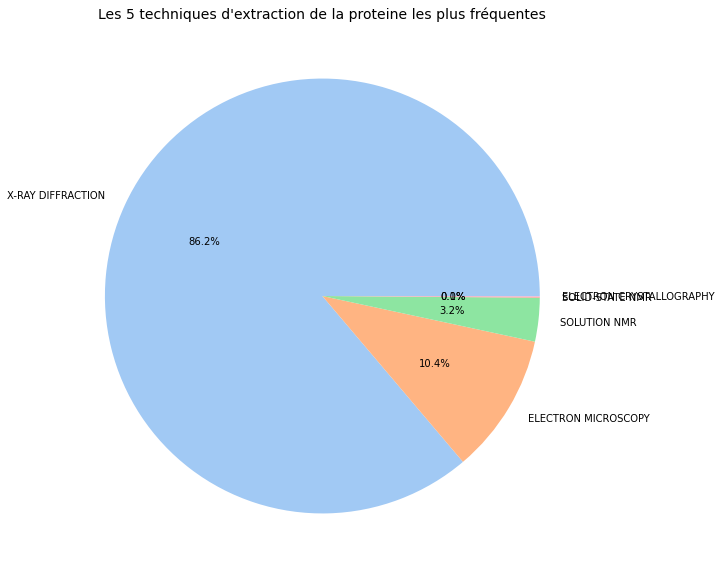

In [7]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(12,10))
plt.pie(x = df_cleaned.experimentalTechnique.value_counts()[:5], 
       labels=df_cleaned['experimentalTechnique'].value_counts().index[:5], 
        colors=colors,
        autopct=lambda x:f"{x:.1f}%")
plt.title("Les 5 techniques d'extraction de la proteine les plus fréquentes", fontsize = 14)
#plt.savefig('images/pie_technique_protein_extraction');

Des trois techniques d'extraction de la proteine les plus fréquentes dans le dataset, l'extraction par __diffraction au rayon X répresente 86%__

#### 1.2 Variable macromoleculeType  <a class="anchor" id="macromoleculeType"></a>

In [5]:
# Percent Macro molecules Type 
df_cleaned.macromoleculeType.value_counts(normalize=False)

Protein                       346325
Protein#RNA                    57898
Protein#DNA                    21343
DNA                             3794
Protein#DNA#RNA                 2712
RNA                             2410
Protein#RNA#DNA/RNA Hybrid       304
Protein#DNA#DNA/RNA Hybrid       159
DNA/RNA Hybrid                   141
DNA#RNA                          125
RNA#DNA/RNA Hybrid                74
Protein#DNA/RNA Hybrid            68
DNA#DNA/RNA Hybrid                26
Name: macromoleculeType, dtype: int64

**79.5%** des macromolécules type sont des **proteines**, 13% sont un melange entre proteines, DNA et RNA, le tout répresnetant 99% des macromolécules 
Restriction du jeu de données aux macromolécules les plus présentes

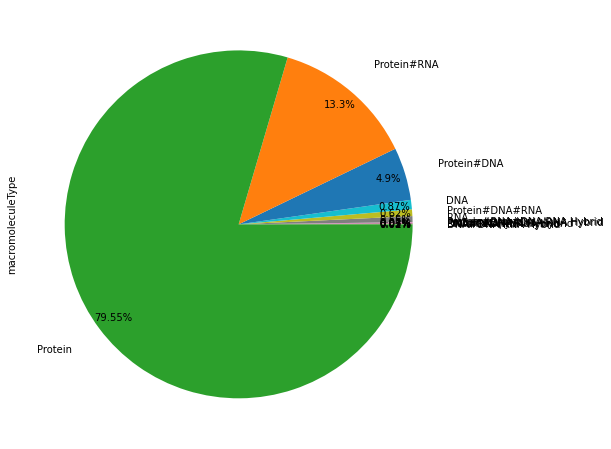

In [9]:
df_cleaned.macromoleculeType.value_counts(ascending = True).plot.pie(figsize = (10,8), autopct = lambda x: str(round(x, 2)) + '%',
                                                             pctdistance = 0.9, labeldistance = 1.2);

In [10]:
print("Nous dénombrons :\n", df_cleaned.classification.nunique(), "techniques d'extractions de la proteine")
print("###"*17)
print("Les 50  classes les plus présentes et leur fréquence ci-dessous:\n", df_cleaned.classification.value_counts(normalize=True)[:50])

Nous dénombrons :
 3595 techniques d'extractions de la proteine
###################################################
Les 50  classes les plus présentes et leur fréquence ci-dessous:
 ribosome                                   0.128856
hydrolase                                  0.101525
transferase                                0.080073
oxidoreductase                             0.074529
immune system                              0.033936
hydrolase/hydrolase inhibitor              0.028620
lyase                                      0.025196
virus                                      0.022991
transcription                              0.022422
ribosome/antibiotic                        0.022093
viral protein                              0.018837
transport protein                          0.018578
isomerase                                  0.014036
signaling protein                          0.013943
structural genomics/unknown function       0.011814
ligase                                

In [6]:
sum(df_cleaned.classification.value_counts()[:17]/df_cleaned.shape[0])

0.6390738386370339

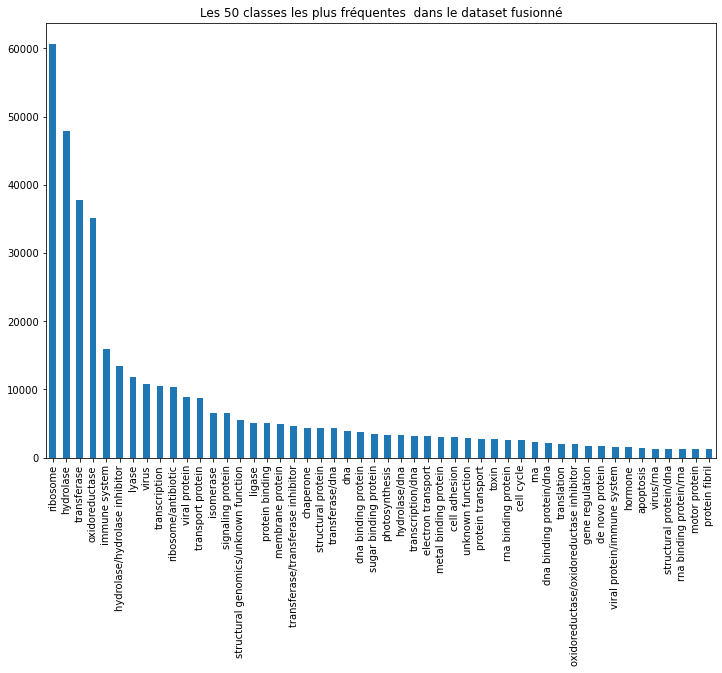

In [12]:
#### 1.3 classification feature 
df_cleaned.classification.value_counts(ascending=True).sort_values(ascending = False)[:50].plot(kind = 'bar', figsize = (12,8),
                                                        title = "Les 50 classes les plus fréquentes  dans le dataset fusionné");

#### 1.3 Variable crystallizationMethod

In [13]:
print("Nous dénombrons :\n", df_cleaned.crystallizationMethod.nunique(), "techniques d'extractions de la proteine")
print("###"*17)
print("Les 10  classes les plus présentes et leur fréquence ci-dessous:\n", df_cleaned.crystallizationMethod.value_counts(normalize=True)[:10])


Nous dénombrons :
 418 techniques d'extractions de la proteine
###################################################
Les 10  classes les plus présentes et leur fréquence ci-dessous:
 vapor diffusion  hanging drop    0.532336
vapor diffusion  sitting drop    0.294325
vapor diffusion                  0.083497
microbatch                       0.031593
evaporation                      0.010891
batch                            0.009760
hanging drop                     0.005258
batch mode                       0.004114
liquid diffusion                 0.002666
microdialysis                    0.002430
Name: crystallizationMethod, dtype: float64


Les __4 premières méthodes de crystallization__ répresentent à elles __94%__ du dataset total 

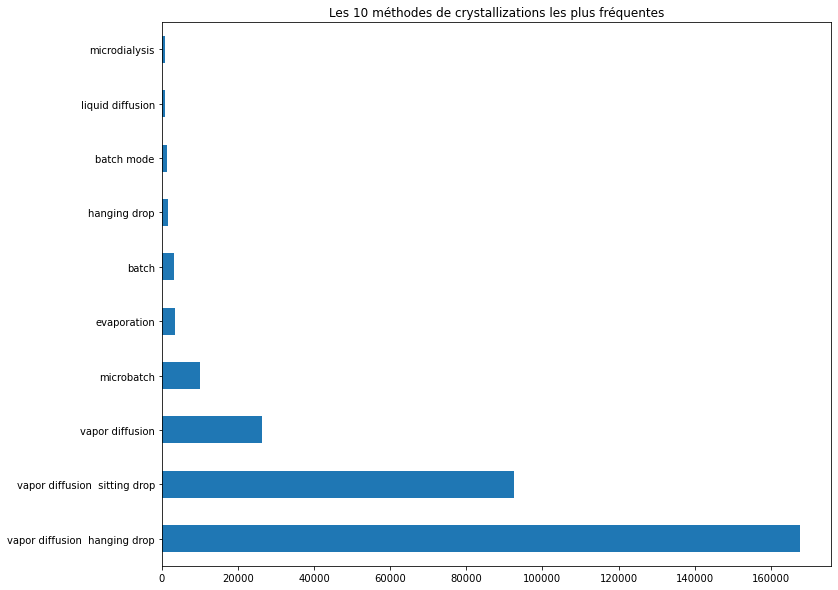

In [14]:
df_cleaned.crystallizationMethod.value_counts(ascending = True).sort_values(ascending = False)[:10].plot(kind = 'barh',
                                                title = "Les 10 méthodes de crystallizations les plus fréquentes",
                                                                                        figsize = (12,10));

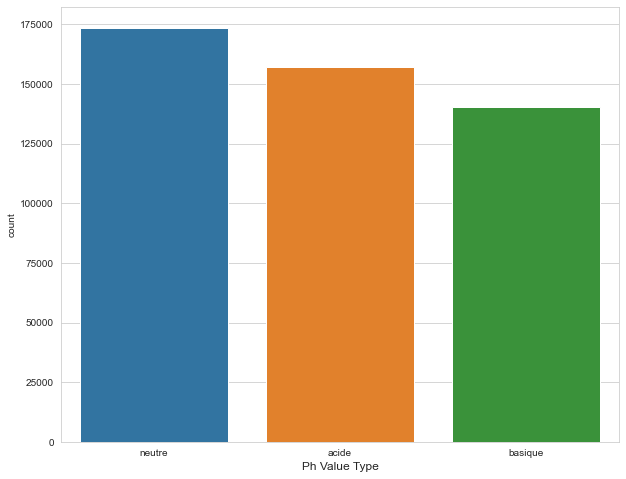

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,8))
sns.countplot(x = 'phValue', data = df_cleaned, order=df_cleaned.phValue.value_counts().index)
plt.xlabel('Ph Value Type', fontsize = 12);

In [16]:
from palettable.colorbrewer.qualitative import Pastel1_7

# create data
labels=list(df_cleaned["phValue"].unique())
sizes=[df_cleaned["phValue"].value_counts()[unique_class]*100/len(df_cleaned["phValue"]) for unique_class in labels]
colors = Pastel1_7.hex_colors
explode = (0,0,0)  # explode a slice if required
plt.figure(figsize = (12,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0), 0.50, color='black', fc='white',linewidth=0.80)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

ModuleNotFoundError: No module named 'palettable'

#### Target Classification vs other features 

In [7]:
count = df_cleaned.classification.value_counts()
types = np.asarray(count[(count > 5000)].index)
data = df_cleaned[df_cleaned['classification'].isin(types)]

In [8]:
#data.dropna(axis =1, inplace = True)

In [9]:
data.isnull().sum()

structureId                     0
classification                  0
experimentalTechnique           0
macromoleculeType           30959
residueCount                    0
resolution                  10116
structureMolecularWeight        0
crystallizationMethod       97304
crystallizationTempK        95039
densityMatthews             53698
densityPercentSol           53693
pdbxDetails                 51044
phValue                         0
publicationYear             41333
chainId                         9
sequence                        2
dtype: int64

In [10]:
data.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
67,117E,hydrolase,X-RAY DIFFRACTION,Protein,572,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",acide,1998.0,A,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
68,117E,hydrolase,X-RAY DIFFRACTION,Protein,572,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",acide,1998.0,B,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
74,11AS,ligase,X-RAY DIFFRACTION,Protein,660,2.50,73530.97,NaN,NaN,2.30,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,basique,1998.0,A,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
75,11AS,ligase,X-RAY DIFFRACTION,Protein,660,2.50,73530.97,NaN,NaN,2.30,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,basique,1998.0,B,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
76,11BA,hydrolase,X-RAY DIFFRACTION,Protein,248,2.06,28700.28,NaN,NaN,2.48,50.36,pH 4.8,acide,1998.0,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...


#### Handling missing values

In [11]:
def imput_cat(df, col):
    nan_cat = df[col].mode()[0]
    df[col].fillna(nan_cat, inplace =True)
   

In [12]:
def imput_num(df, col):
    nan_num = df[col].median()
    df[col].fillna(nan_num, inplace = True)

In [13]:
imput_num(data, 'densityMatthews')
imput_num(data, 'densityPercentSol')
imput_num(data, 'publicationYear')
imput_num(data, 'resolution')


C:\Users\Utilisateur\TRAINING_DATA_SCIENCE\SuiteAnaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
imput_cat(data, 'crystallizationMethod')
imput_cat(data, 'crystallizationTempK')
imput_cat(data, 'resolution')
imput_cat(data, 'sequence')
imput_cat(data, 'macromoleculeType')

In [15]:
data.isnull().sum()

structureId                     0
classification                  0
experimentalTechnique           0
macromoleculeType               0
residueCount                    0
resolution                      0
structureMolecularWeight        0
crystallizationMethod           0
crystallizationTempK            0
densityMatthews                 0
densityPercentSol               0
pdbxDetails                 51044
phValue                         0
publicationYear                 0
chainId                         9
sequence                        0
dtype: int64

In [16]:
## Macromolécule type 

count = data.macromoleculeType.value_counts()
types = np.asarray(count[(count >20000)].index)
data = data[data['macromoleculeType'].isin(types)]

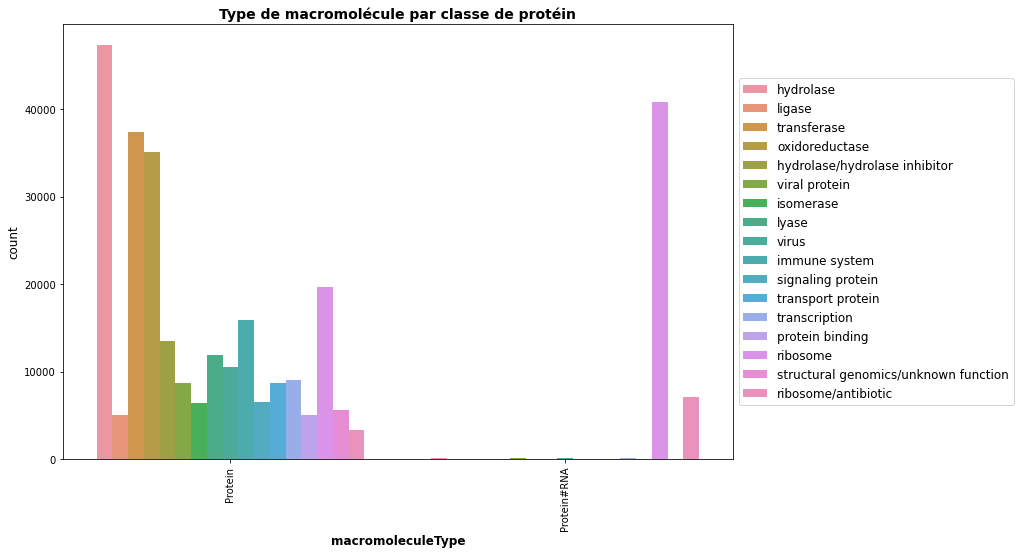

In [17]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(12,8))
plt.xlabel('Type de macromolécule', fontsize=12, fontweight='bold')
plt.ylabel('count', fontsize=12)
plt.title("Type de macromolécule par classe de protéin",fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
g = sns.countplot(x='macromoleculeType', data=data, hue='classification')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.savefig('images/figures/count_macromolecule_target.png');

In [18]:
crys = data.crystallizationMethod.value_counts()
types = np.asarray(crys[(crys > 500 )].index)
data=data[data.crystallizationMethod.isin(types)]

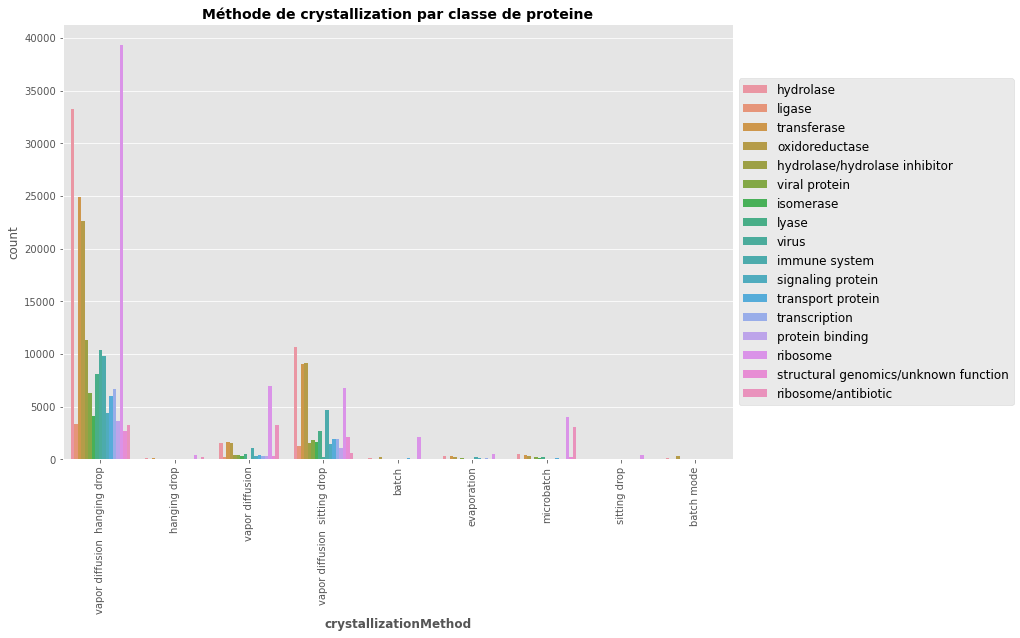

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.xlabel('crystallization method', fontsize=12, fontweight='bold')
plt.ylabel('count', fontsize=12)
plt.title("Méthode de crystallization par classe de proteine",fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
g = sns.countplot(x='crystallizationMethod', data=data, hue='classification')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12);

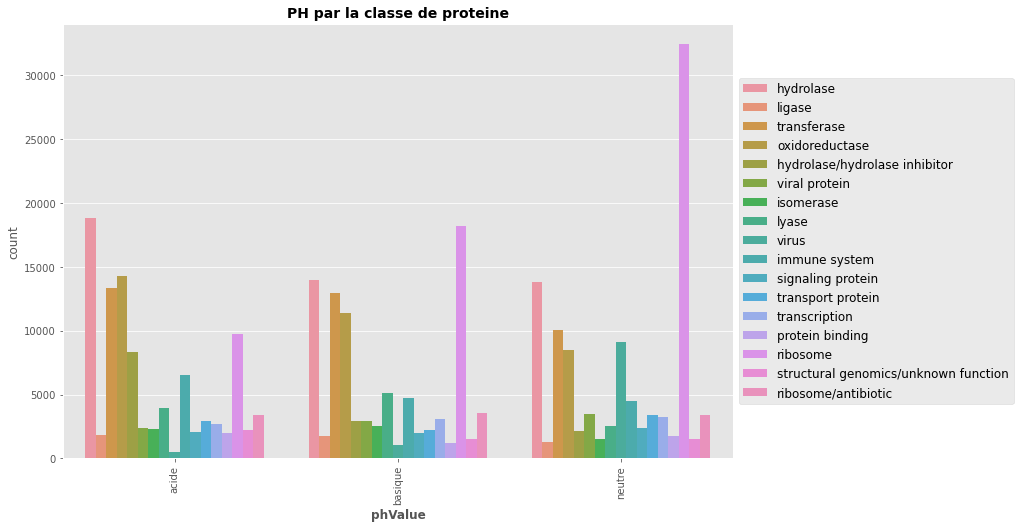

In [22]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(12,8))
plt.xlabel('PH', fontsize=12, fontweight='bold')
plt.ylabel('count', fontsize=12)
plt.title("PH par la classe de proteine",fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
g = sns.countplot(x=data['phValue'], data=data, hue='classification')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12);

#### box plot numercial feature  vs target feature

In [23]:
ordering = data.groupby(['classification'])['residueCount'].median().iloc[::-1].index

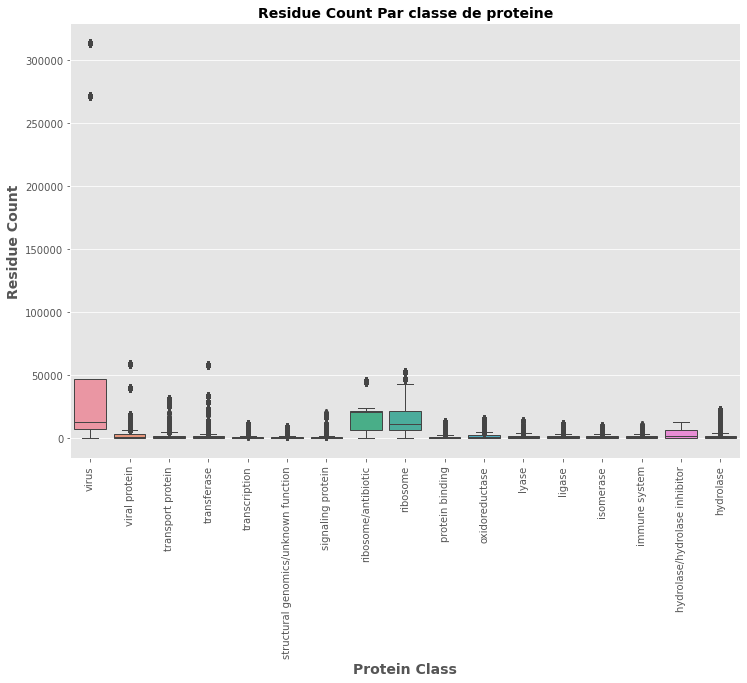

In [24]:
plt.style.use('seaborn-deep')
ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=data['residueCount'], x=data['classification'], linewidth=1, order=ordering)
plt.title('Residue Count Par classe de proteine', fontsize=14, fontweight='bold')
plt.xlabel('Protein Class', fontsize=14, fontweight='bold')
plt.ylabel('Residue Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=90);

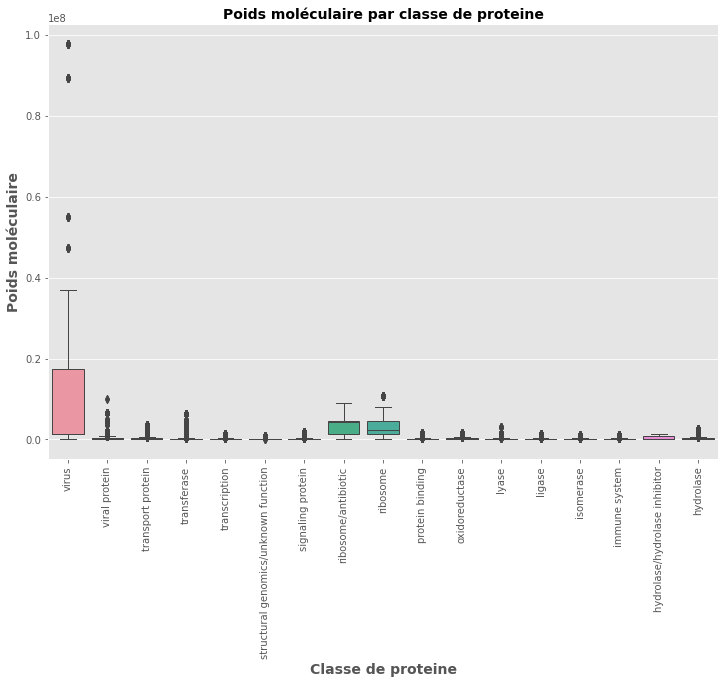

In [25]:
ordering = data.groupby(['classification'])['structureMolecularWeight'].mean().iloc[::-1].index
plt.style.use('seaborn-deep')
ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=data['structureMolecularWeight'], x=data['classification'], linewidth=1, order=ordering)
plt.title('Poids moléculaire par classe de proteine', fontsize=14, fontweight='bold')
plt.xlabel('Classe de proteine', fontsize=14, fontweight='bold')
plt.ylabel('Poids moléculaire', fontsize=14, fontweight='bold')
plt.xticks(rotation=90);

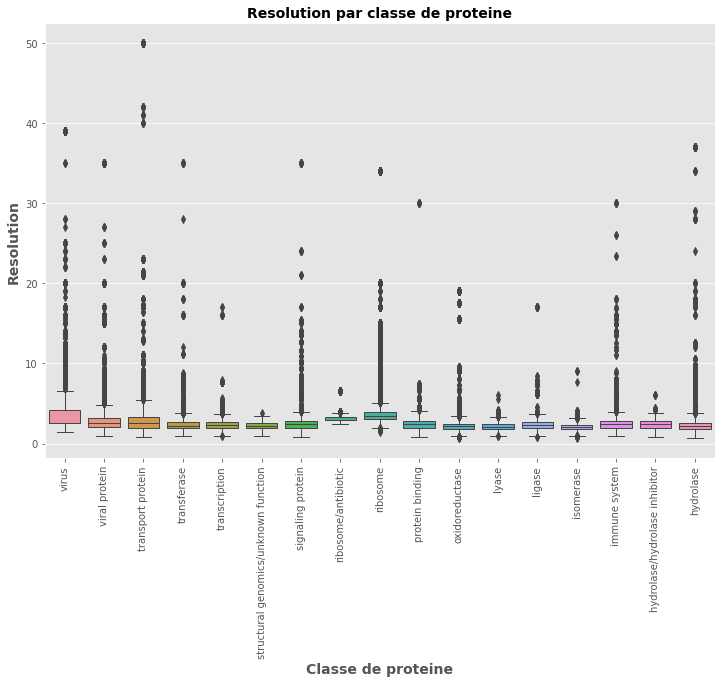

In [26]:
ordering = data.groupby(['classification'])['resolution'].mean().iloc[::-1].index
plt.style.use('seaborn-deep')
ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=data['resolution'], x=data['classification'], linewidth=1, order=ordering)
plt.title('Resolution par classe de proteine', fontsize=14, fontweight='bold')
plt.xlabel('Classe de proteine', fontsize=14, fontweight='bold')
plt.ylabel('Resolution', fontsize=14, fontweight='bold')
plt.xticks(rotation=90);

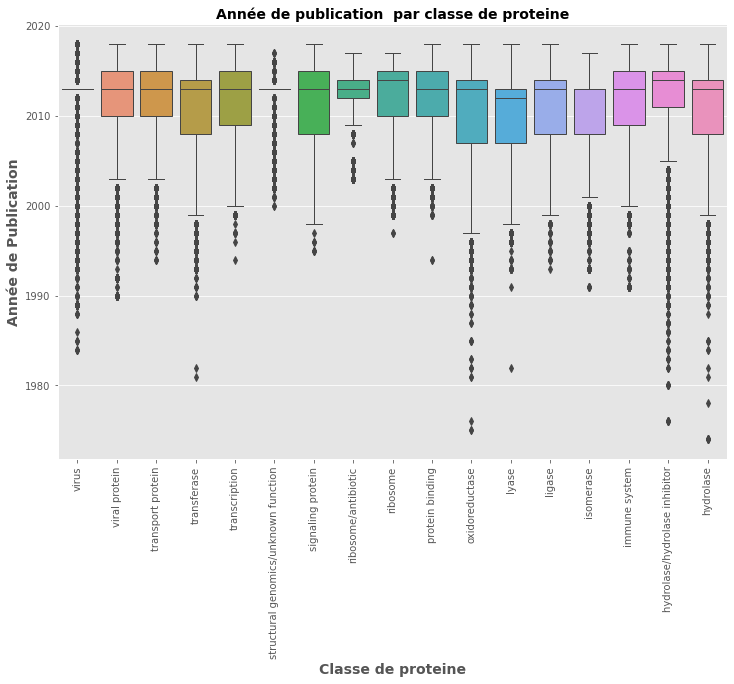

In [27]:
ordering = data.groupby(['classification'])['publicationYear'].mean().iloc[::-1].index
plt.style.use('seaborn-deep')
ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=data['publicationYear'], x=data['classification'], linewidth=1, order=ordering)
plt.title("Année de publication  par classe de proteine", fontsize=14, fontweight='bold')
plt.xlabel('Classe de proteine', fontsize=14, fontweight='bold')
plt.ylabel('Année de Publication', fontsize=14, fontweight='bold')
plt.xticks(rotation=90);

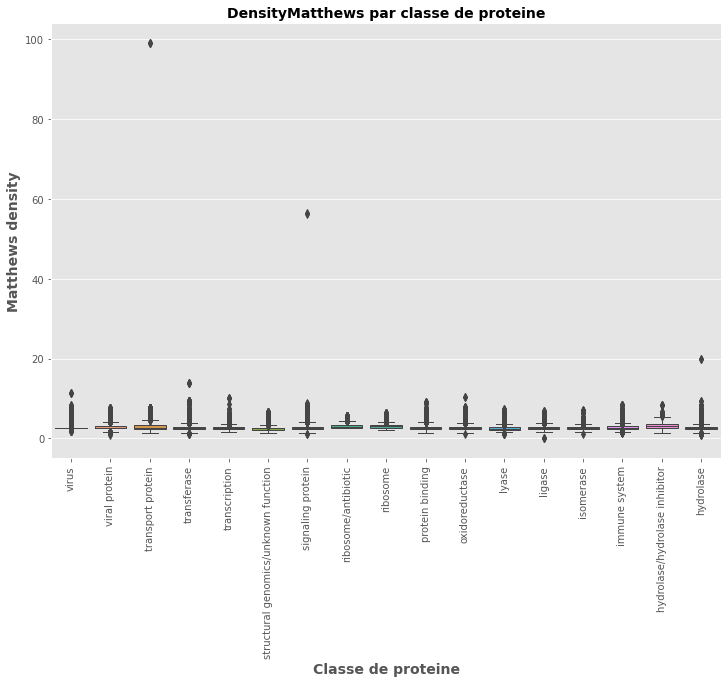

In [28]:
ordering = data.groupby(['classification'])['densityMatthews'].mean().iloc[::-1].index
plt.style.use('seaborn-deep')
ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=data['densityMatthews'], x=data['classification'], linewidth=1, order=ordering)
plt.title("DensityMatthews par classe de proteine", fontsize=14, fontweight='bold')
plt.xlabel('Classe de proteine', fontsize=14, fontweight='bold')
plt.ylabel('Matthews density', fontsize=14, fontweight='bold')
plt.xticks(rotation=90);

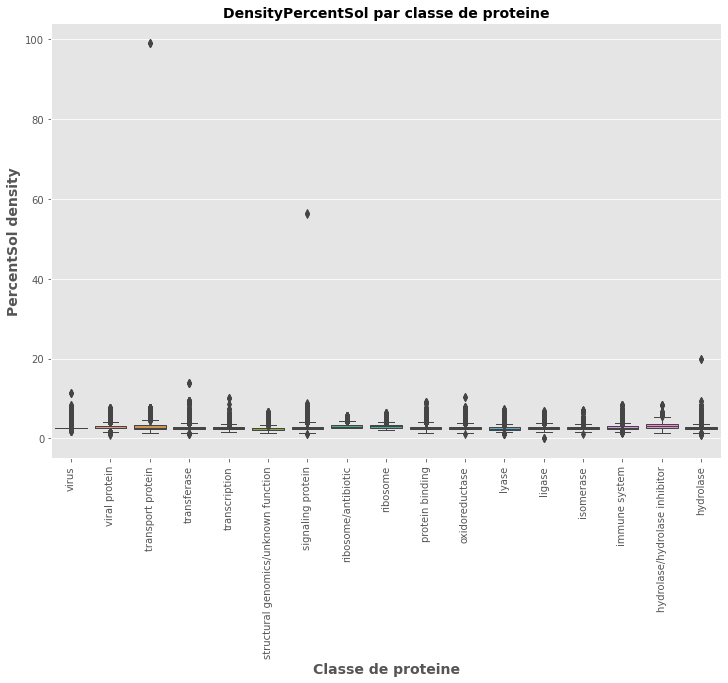

In [29]:
ordering = data.groupby(['classification'])['densityPercentSol'].mean().iloc[::-1].index
plt.style.use('seaborn-deep')
ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=data['densityMatthews'], x=data['classification'], linewidth=1, order=ordering)
plt.title("DensityPercentSol par classe de proteine", fontsize=14, fontweight='bold')
plt.xlabel('Classe de proteine', fontsize=14, fontweight='bold')
plt.ylabel('PercentSol density', fontsize=14, fontweight='bold')
plt.xticks(rotation=90);

In [47]:
#### Classification traget feature counntplot

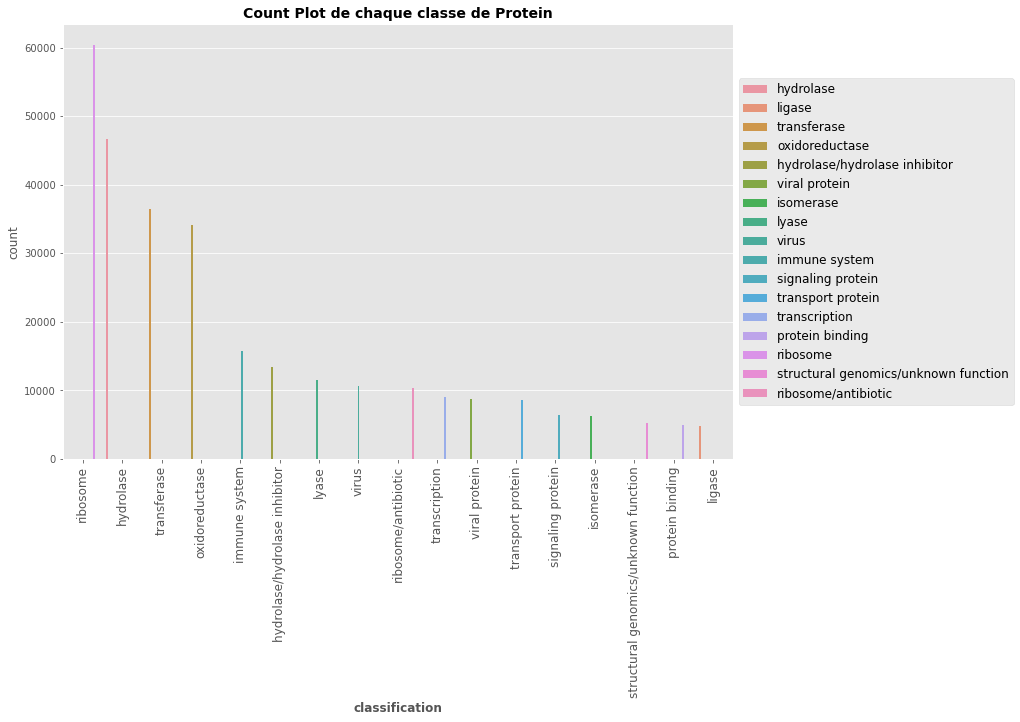

In [30]:
# count plot of classification
plt.style.use('seaborn-deep')
plt.figure(figsize=(12,8))
plt.xlabel('classification', fontsize=12, fontweight = 'bold')
plt.ylabel('count', fontsize=12)
plt.title("Count Plot de chaque classe de Protein",fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize = 12)
g = sns.countplot(x=data['classification'], data=data, hue='classification', order=data.classification.value_counts().index)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12);

### correlation Matrix 

In [50]:
corelated = df_cleaned.corr()

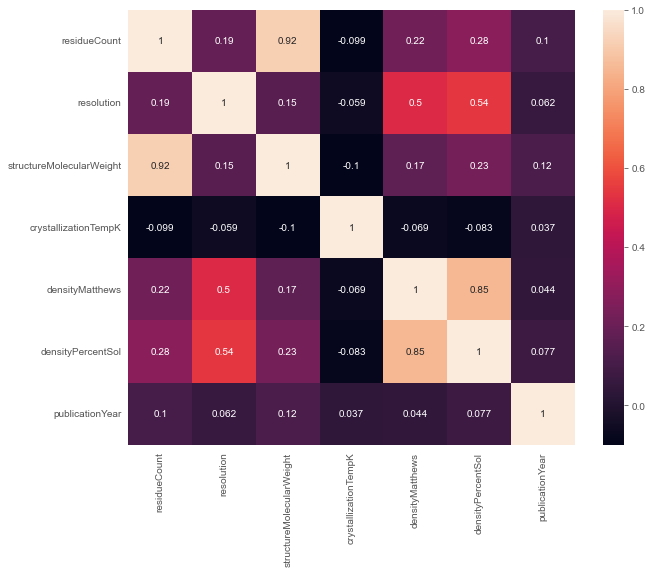

In [51]:
plt.figure(figsize = (10,8))
sns.heatmap(corelated, annot=True);

#### PairPlot Analysis 

No handles with labels found to put in legend.


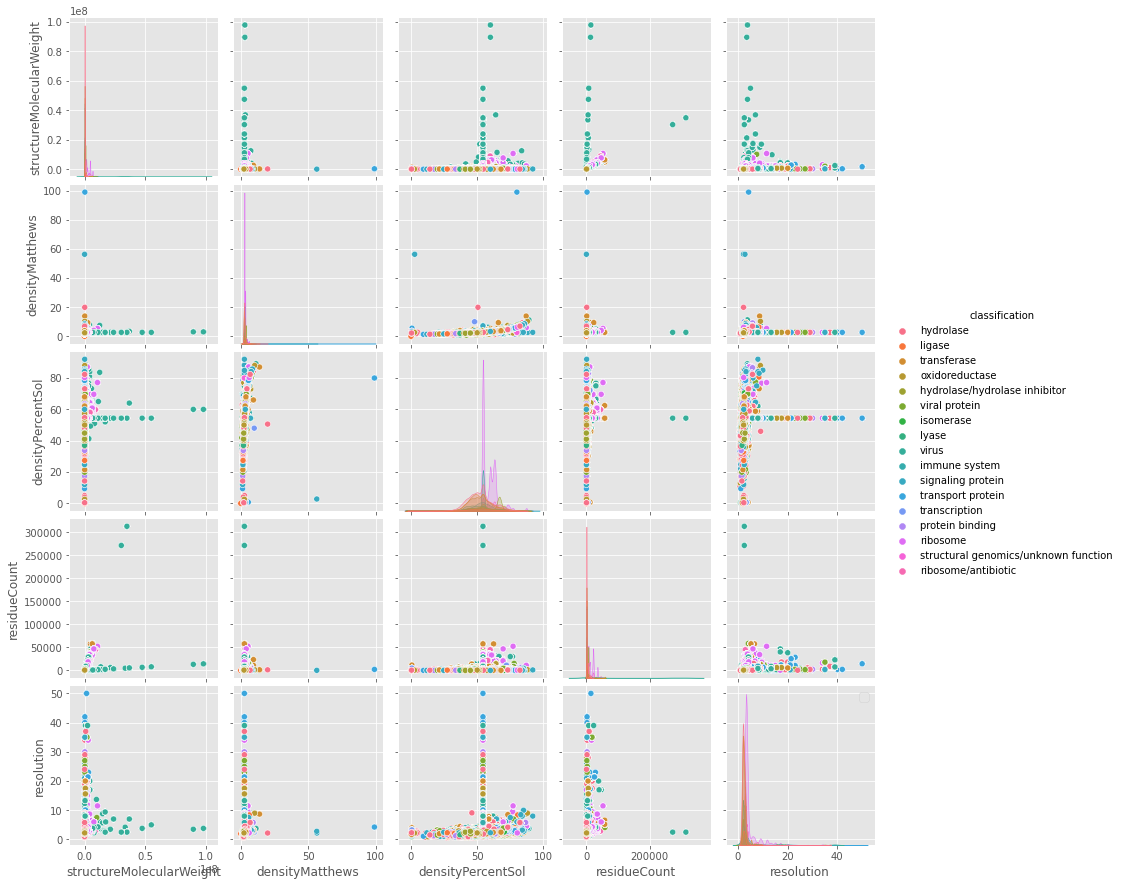

In [38]:
sns.pairplot(data[['structureMolecularWeight', 
                   'densityMatthews', 
                   'densityPercentSol', 
                   'residueCount',
                   'resolution', 'classification']],
             hue='classification', 
            diag_kind='kde')
plt.legend(loc = 1, fontsize = 12);
#plt.savefig('images/figures/pairplot.png')

In [52]:
data = data.dropna(axis = 1)

#### Sequence Analysis

In [53]:
data['seq_char_count']= data['sequence'].apply(lambda x: len(x))

In [54]:
data.seq_char_count.values

array([286, 286, 330, ...,   5, 444, 444], dtype=int64)

C:\Users\Utilisateur\TRAINING_DATA_SCIENCE\SuiteAnaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


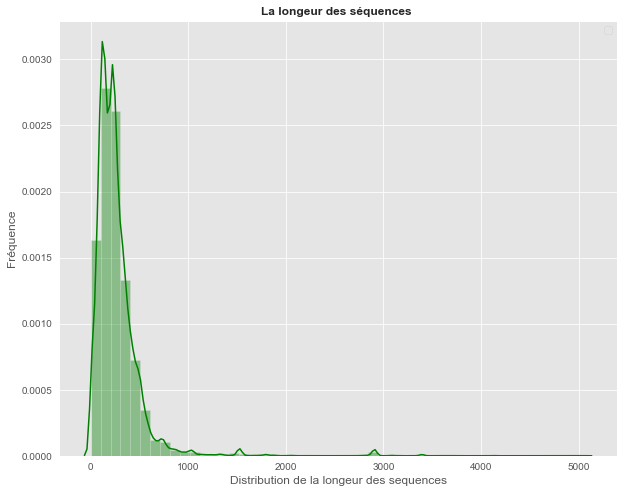

In [55]:
plt.figure(figsize = (10,8))
sns.distplot(x = data.seq_char_count.values, color='g')
plt.xlabel("Distribution de la longeur des sequences")
plt.ylabel("Fréquence")
plt.title("La longeur des séquences ", fontsize = 12,  fontweight = "bold")
plt.legend(loc = "best");

In [60]:
from collections import Counter 
def freq_seq(data):
    data = data.apply(lambda x: " ".join(x))
    
    seq = []
    
    for i in data: # concatination of all codes
        seq.extend(i)

    seq_dict= Counter(seq)
    seq_dict.pop(' ') # removing white space
    
    df = pd.DataFrame({'sequences': list(seq_dict.keys()), 'frequence': list(seq_dict.values())})
    return df.sort_values('frequence', ascending=False).reset_index()[['sequences', 'frequence']]

In [65]:
seq_freq = freq_seq(data['sequence'])
seq_freq

,sequences,frequence
0,G,7402920
1,A,7381409
2,L,6420196
3,V,5248695
4,E,4723412
5,S,4429004
6,K,4389384
7,I,4051464
8,R,4050330
9,T,4046969


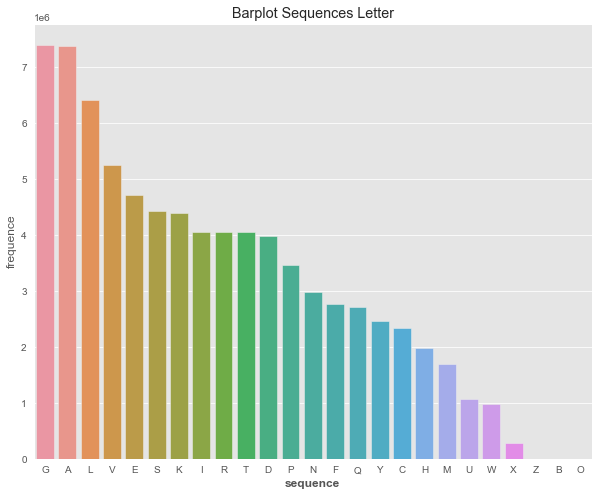

In [73]:
plt.figure(figsize =(10,8))
sns.barplot(x = 'sequences', y = 'frequence', data = seq_freq )
plt.title("Barplot Sequences Letter")
plt.xlabel("sequence", fontweight = "bold", fontsize = 12)
plt.show()